# Step 0: Create a new conda env for deep learning

One env per *project* seems like the theoretical right way to use conda. But in practice, I know I won't follow that convention for smaller projects.

Compromise: I'll compartmentalize my envs in the style of AWS's deep-learning AMI -- just the `tensorflow_p36` combination for now:

    Welcome to Ubuntu 16.04.4 LTS (GNU/Linux 4.4.0-1062-aws x86_64v)

    Please use one of the following commands to start the required environment with the framework of your choice:
    for MXNet(+Keras2) with Python3 (CUDA 9.0 and Intel MKL-DNN) _______________________________ source activate mxnet_p36
    for MXNet(+Keras2) with Python2 (CUDA 9.0 and Intel MKL-DNN) _______________________________ source activate mxnet_p27
    for TensorFlow(+Keras2) with Python3 (CUDA 9.0 and Intel MKL-DNN) _____________________ source activate tensorflow_p36 <<<
    for TensorFlow(+Keras2) with Python2 (CUDA 9.0 and Intel MKL-DNN) _____________________ source activate tensorflow_p27
    for Theano(+Keras2) with Python3 (CUDA 9.0) _______________________________________________ source activate theano_p36
    [...]

Following the DL AMI offerings, I'm gonna stick with python 3.6. For what it's worth, Tensorflow 2.0 doesn't support 3.7 yet, at the time of this writing. Online discussions suggest that docker images are the way to go for TF, but I'll see how far conda gets me.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.2.4-tf'

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [24]:
def show_digits(images, labels, preds, nrows, ncols, i0=0):
    n = nrows * ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    
    for i, ax in enumerate(axes.flatten()):
        idx = i0 + i
        
        ax.imshow(images[idx], cmap='Greys_r')
        
        title_string = f'image {idx}\nlabel={labels[idx]}'
        c = 'k'
        
        if preds is not None:
            title_string += f', pred={preds[idx]}'
            if preds[idx] != labels[idx]:
                c='r'
        ax.set_title(title_string, c=c)
        
    plt.tight_layout()

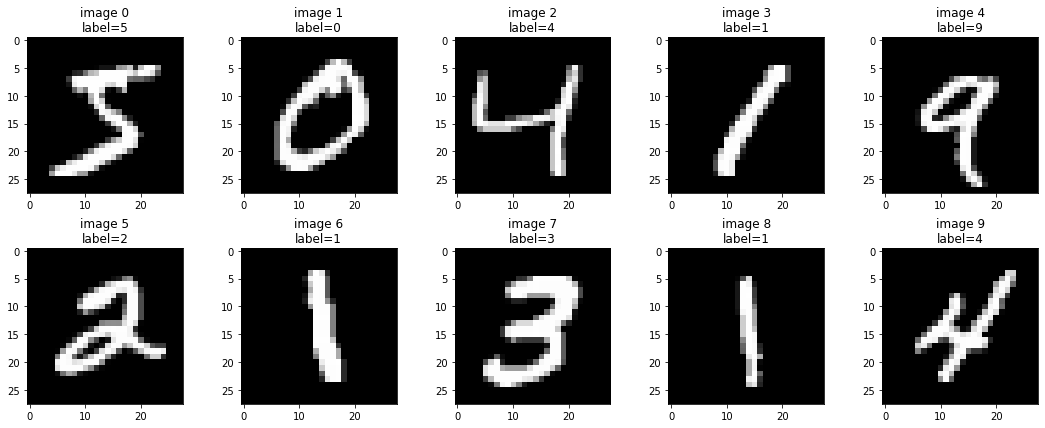

In [25]:
show_digits(train_images, train_labels, None, 2, 5, 0)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

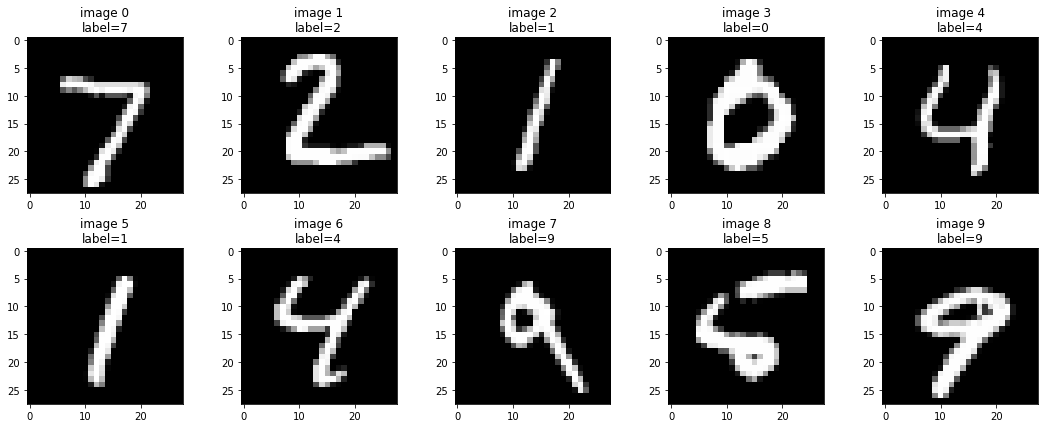

In [9]:
show_digits(test_images, test_labels, None, 2, 5, 0)

In [10]:
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

train_labels_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
history = model.fit(train_images, train_labels_cat, epochs=20, batch_size=128, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
54000/54000 [==============================] - 2s 28us/sample - loss: 8.8247 - acc: 0.4506 - val_loss: 8.2325 - val_acc: 0.4885
Epoch 2/20
54000/54000 [==============================] - 1s 23us/sample - loss: 7.3565 - acc: 0.5420 - val_loss: 6.8024 - val_acc: 0.5767
Epoch 3/20
54000/54000 [==============================] - 1s 22us/sample - loss: 6.9338 - acc: 0.5687 - val_loss: 6.7302 - val_acc: 0.5817
Epoch 4/20
54000/54000 [==============================] - 1s 22us/sample - loss: 6.8662 - acc: 0.5732 - val_loss: 6.6922 - val_acc: 0.5843
Epoch 5/20
54000/54000 [==============================] - 1s 23us/sample - loss: 6.8340 - acc: 0.5754 - val_loss: 6.8293 - val_acc: 0.5753
Epoch 6/20
54000/54000 [==============================] - 1s 23us/sample - loss: 6.7904 - acc: 0.5781 - val_loss: 6.6515 - val_acc: 0.5870
Epoch 7/20
54000/54000 [==============================] - 1s 26us/sam

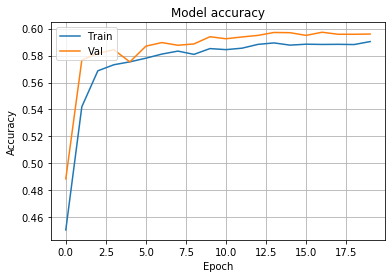

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 0s 20us/sample - loss: 6.5787 - acc: 0.5913


In [17]:
print('test_acc:', test_acc)

test_acc: 0.5913


In [18]:
preds = model.predict(train_images[0:10, :]).argmax(axis=1)
preds

array([8, 0, 4, 1, 4, 2, 1, 8, 1, 4])

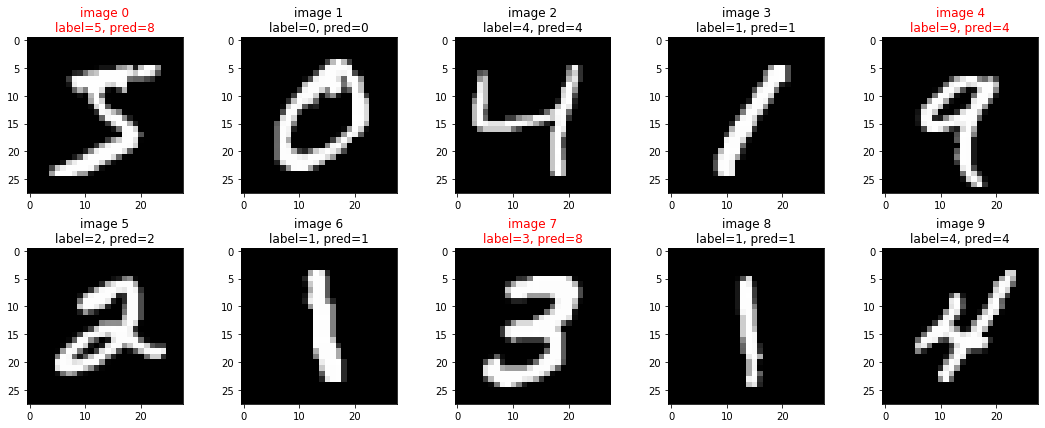

In [26]:
show_digits(train_images[:10].reshape(10, 28, 28), 
            train_labels[:10], 
            preds, 2, 5)